In [1]:
import geopandas as gp
%matplotlib inline
import pandas as pd

In [2]:
import folium

# Colombia

## loading shapefiles

In [3]:
shp_state = gp.read_file('data/colombia/ADMINISTRATIVO/MGN_DPTO_POLITICO.shp')
col_state = ['DPTO_CCDGO','DPTO_CNMBR', 'geometry']
shp_munic = gp.read_file('data/colombia/ADMINISTRATIVO/MGN_MPIO_POLITICO.shp')
col_munic = ['DPTO_CCDGO','MPIO_CCDGO', 'MPIO_CNMBR', 'DPTO_CNMBR', 'geometry']
shp_state.shape, shp_munic.shape

((33, 9), (1122, 11))

In [4]:
# CLAS_CCDGO: 1-Municipal Headboard 2-populated center 3-scattered rural area 
# 1-Cabecera municipal, 2-Centro poblado y 3-Área rural dispersa.
shp_urb_censal = gp.read_file('data/colombia/MGN/MGN_URB_AREA_CENSAL.shp')
print(shp_urb_censal.shape)
shp_urb_censal=shp_urb_censal.merge(shp_munic[col_munic[:-1]])
shp_urb_censal.head()

(7627, 14)


,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SECR_CCDGO,CPOB_CCDGO,CPOB_CNMBR,CPOB_CCNCT,CPOB_NAREA,CPOB_NALT,Shape_Leng,Shape_Area,geometry,MPIO_CNMBR,DPTO_CNMBR
0,1,05,05001,2,000,00,05001004,SANTA ELENA,05001200000004,0.338461,2540.0,0.034407,0.000028,POLYGON ((-75.49783904499998 6.207774365000034...,MEDELLÍN,ANTIOQUIA
1,2,05,05001,2,000,00,05001014,BARRO BLANCO,05001200000014,0.534495,2531.0,0.044447,0.000044,POLYGON ((-75.47379840599996 6.239590113000077...,MEDELLÍN,ANTIOQUIA
2,3,05,05001,2,000,00,05001015,EL CERRO,05001200000015,0.414935,2668.0,0.042879,0.000034,(POLYGON ((-75.49121943999995 6.20501584900006...,MEDELLÍN,ANTIOQUIA
3,4,05,05001,2,000,00,05001018,EL PLACER,05001200000018,0.965299,2598.0,0.056312,0.000079,"POLYGON ((-75.49276999399996 6.23050003000003,...",MEDELLÍN,ANTIOQUIA
4,5,05,05001,2,000,00,05001019,EL PLAN,05001200000019,3.252561,2700.0,0.093795,0.000266,POLYGON ((-75.50917742799999 6.195200505000059...,MEDELLÍN,ANTIOQUIA


### shp_urb_censal stats

In [ ]:
shp_urb_censal.groupby('MPIO_CCDGO').size().value_counts().sort_index().plot(kind='bar',figsize=(10,6))

In [7]:
shp_urb_censal['gp_norm_CPOB_NAREA']= shp_urb_censal.groupby('MPIO_CCDGO')['CPOB_NAREA'].transform(lambda x: x/x.sum())
shp_urb_censal.groupby('MPIO_CCDGO')['gp_norm_CPOB_NAREA'].sum().value_counts()

1.0    780
1.0    162
1.0    109
1.0     49
1.0     14
1.0      3
1.0      3
1.0      1
Name: gp_norm_CPOB_NAREA, dtype: int64

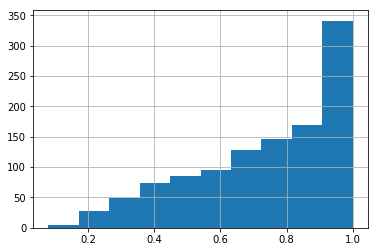

In [8]:
shp_urb_censal[shp_urb_censal.CLAS_CCDGO=='1'].gp_norm_CPOB_NAREA.hist()

In [9]:
shp_urb_censal[(shp_urb_censal.gp_norm_CPOB_NAREA>0.8)&(shp_urb_censal.CLAS_CCDGO=='1')].shape

(533, 17)

In [10]:
# print('\n'.join(shp_urb_censal.CPOB_CNMBR.unique().tolist()))
# shp_urb_censal.CPOB_CNMBR.nunique()

### loading urb_sector

In [11]:
shp_urb_sector = gp.read_file('data/colombia/MGN/MGN_URB_SECTOR.shp')
print(shp_urb_sector.shape)
shp_urb_sector.head()

(11683, 12)


,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SECR_CCDGO,CPOB_CCDGO,SETU_CCDGO,SETU_CCNCT,Shape_Leng,Shape_Area,geometry
0,1,05,05001,2,003,04,05001004,0001,050012003040040001,0.034407,0.000028,POLYGON ((-75.49783904499998 6.207774365000034...
1,2,05,05001,2,003,02,05001014,0001,050012003020140001,0.044447,0.000044,POLYGON ((-75.47379840599996 6.239590113000077...
2,3,05,05001,2,003,04,05001015,0001,050012003040150001,0.042879,0.000034,(POLYGON ((-75.49121943999995 6.20501584900006...
3,4,05,05001,2,003,03,05001018,0001,050012003030180001,0.056312,0.000079,"POLYGON ((-75.49276999399996 6.23050003000003,..."
4,5,05,05001,2,003,04,05001019,0001,050012003040190001,0.093795,0.000266,POLYGON ((-75.51171155399999 6.193787105000069...


### loading rur sector

In [12]:
# rural head is the same as urb head
shp_rur_sector = gp.read_file('data/colombia/MGN/MGN_RUR_SECTOR.shp')
shp_rur_sector.MPIO_CCDGO = shp_rur_sector.DPTO_CCDGO + shp_rur_sector.MPIO_CCDGO
print(shp_rur_sector.shape)
shp_rur_sector.head()

(7376, 12)


,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SETR_CCNCT,SETR_NAREA,SETR_CSMBL,SETR_NANO,Shape_Leng,Shape_Area,geometry
0,1,76,76001,1,000,760011000,146.072445,7,2017,0.952268,0.011888,"POLYGON ((-76.49128586699999 3.50561076200006,..."
1,2,76,76001,3,001,760013001,68.581741,7,2017,0.518300,0.005582,"POLYGON ((-76.59175165999994 3.54688238600005,..."
2,3,76,76001,3,002,760013002,53.929578,7,2017,0.513226,0.004389,POLYGON ((-76.60388898799994 3.483201765000047...
3,4,76,76001,3,003,760013003,86.889754,7,2017,0.593111,0.007071,POLYGON ((-76.59701886299996 3.442173040000057...
4,5,76,76001,3,004,760013004,71.450813,7,2017,0.406638,0.005814,POLYGON ((-76.58409746299998 3.385408527000038...


## output maps

In [13]:
def geojson_per_row(gpdf, name, color='blue', tip_cols=None, some_map=None):

    feature_group = folium.FeatureGroup(name=name)
    for row in gpdf.itertuples():

        if row.geometry.boundary.type=='MultiLineString':
            lines = row.geometry.boundary
        else:
            lines= [row.geometry.boundary]
            
        for line in lines:
            print
            tip = '<br>'.join(['%s: %s' % (col, getattr(row, col)) for col in tip_cols]) if tip_cols is not None else name
            folium.Polygon(locations=[(lat,lon) for lon,lat in line.coords], color=color, fill_color=color, tooltip=tip, popup=tip).add_to(feature_group)
    if some_map is not None:
        feature_group.add_to(some_map)
    return feature_group

In [55]:
some_map = folium.Map(location=[4.149624, -72.795576], zoom_start=6)
tip_cols_censal = ['DPTO_CNMBR', 'MPIO_CNMBR', 'CPOB_CNMBR', 'CPOB_CCDGO', 'gp_norm_CPOB_NAREA']
tip_cols_rur = ['DPTO_CCDGO', 'MPIO_CCDGO', 'SETR_CCNCT']
tip_cols_urb_sector = ['DPTO_CCDGO', 'MPIO_CCDGO', 'CPOB_CCDGO', 'SETU_CCNCT']

# fg_urb_censal = geojson_per_row(shp_urb_censal, 'urban censal', color='blue', tip_cols=['DPTO_CNMBR', 'MPIO_CNMBR', 'CPOB_CNMBR'], some_map=some_map)
# fg_urb_sector = geojson_per_row(shp_urb_sector, 'urban sector', color='red', tip_cols=['SETU_CCNCT'], some_map=some_map)

target_municipio =['05001','11001', '76001', '08001', '13001','54001','68001', '73001', '08758', '66001']

geojson_per_row(shp_munic[(shp_munic.MPIO_CCDGO.isin(target_municipio))], 'municipality', color='black', tip_cols=['MPIO_CNMBR'], some_map=some_map)

# geojson_per_row(shp_urb_sector[(shp_urb_sector.MPIO_CCDGO.isin(target_municipio))&(shp_urb_sector.CLAS_CCDGO=='2')], 'urban sector None head', color='purple', tip_cols=tip_cols_urb_sector, some_map=some_map)
# geojson_per_row(shp_urb_sector[(shp_urb_sector.MPIO_CCDGO.isin(target_municipio))&(shp_urb_sector.CLAS_CCDGO=='1')], 'urban sector head', color='orange', tip_cols=tip_cols_urb_sector, some_map=some_map)

geojson_per_row(shp_rur_sector[(shp_rur_sector.MPIO_CCDGO.isin(target_municipio))&(shp_rur_sector.CLAS_CCDGO=='3')], 'Área rural dispersa', color='green', tip_cols=tip_cols_rur, some_map=some_map)

geojson_per_row(shp_urb_censal[(shp_urb_censal.MPIO_CCDGO.isin(target_municipio))&(shp_urb_censal.CLAS_CCDGO=='2')], 'Centro poblado y', color='blue', tip_cols=tip_cols_censal, some_map=some_map)
geojson_per_row(shp_urb_censal[(shp_urb_censal.MPIO_CCDGO.isin(target_municipio))&(shp_urb_censal.CLAS_CCDGO=='1')], 'Cabecera municipal', color='red', tip_cols=tip_cols_censal, some_map=some_map)

folium.LayerControl().add_to(some_map)
some_map.save('tmp/col urb subset.html')

In [53]:
shp_urb_censal[(shp_urb_censal.MPIO_CCDGO.isin(target_municipio))&(shp_urb_censal.CLAS_CCDGO=='1')]

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SECR_CCDGO,CPOB_CCDGO,CPOB_CNMBR,CPOB_CCNCT,CPOB_NAREA,CPOB_NALT,Shape_Leng,Shape_Area,geometry,MPIO_CNMBR,DPTO_CNMBR,gp_norm_CPOB_NAREA
27,733,05,05001,1,000,00,05001000,MEDELLÍN,05001100000000,117.382519,1500.0,1.157403,0.009585,(POLYGON ((-75.56574998699995 6.31264554700004...,MEDELLÍN,ANTIOQUIA,0.889407
746,747,11,11001,1,000,00,11001000,"BOGOTÁ, DISTRITO CAPITAL",11001100000000,416.069805,2630.0,2.176823,0.033911,(POLYGON ((-74.04082653899997 4.82704859100005...,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",0.997876
843,840,08,08758,1,000,00,08758000,SOLEDAD,08758100000000,35.984956,40.0,0.376319,0.002975,POLYGON ((-74.76071254599998 10.94417011500008...,SOLEDAD,ATLÁNTICO,1.000000
844,843,08,08001,1,000,00,08001000,"BARRANQUILLA, DISTRITO ESPECIAL, INDUSTRIAL Y ...",08001100000000,101.298592,72.0,1.172873,0.008378,POLYGON ((-74.84267558199997 11.06153393100004...,"DISTRITO ESPECIAL, INDUSTRIAL Y PORTUARIO DE B...",ATLÁNTICO,1.000000
1333,1334,13,13001,1,000,00,13001000,"CARTAGENA DE INDIAS, DISTRITO TURÍSTICO, HISTÓ...",13001100000000,83.252847,2.0,1.067990,0.006869,POLYGON ((-75.51257653799996 10.45582820400006...,CARTAGENA DE INDIAS,BOLÍVAR,0.864536
5249,5398,54,54001,1,000,00,54001000,SAN JOSÉ DE CÚCUTA,54001100000000,72.973643,320.0,0.660399,0.005979,(POLYGON ((-72.47406791099996 7.96117334500007...,CÚCUTA,NORTE DE SANTANDER,0.940567
5495,5496,66,66001,1,000,00,66001000,PEREIRA,66001100000000,32.915494,1411.0,0.752659,0.002681,(POLYGON ((-75.72790011599994 4.83152036200004...,PEREIRA,RISARALDA,0.717676
5653,5654,68,68001,1,000,00,68001000,BUCARAMANGA,68001100000000,55.240859,959.0,0.572295,0.004521,POLYGON ((-73.14495651599998 7.183825556000045...,BUCARAMANGA,SANTANDER,0.993160
6401,6633,73,73001,1,000,00,73001000,IBAGUÉ,73001100000000,47.963304,1284.0,1.089421,0.003906,(POLYGON ((-75.20142790199998 4.46374441400007...,IBAGUÉ,TOLIMA,0.892563
6688,7170,76,76001,1,000,00,76001000,SANTIAGO DE CALI,76001100000000,146.339430,960.0,0.952268,0.011888,"POLYGON ((-76.49128586699999 3.50561076200006,...",CALI,VALLE DEL CAUCA,0.937978


## cities in ECSC2012
http://www.dane.gov.co/index.php/estadisticas-por-tema/seguridad-y-defensa/encuesta-de-convivencia-y-seguridad-ciudadana-ecsc/resultados-2012

In [43]:
# find corresponding cities
# with this map: http://www.dane.gov.co/files/investigaciones/poblacion/convivencia/Pres_ecsc.pdf, P7
cnames = ['Armenia', 'Barranquilla', 'Soledad', 'Bogotá', 'Soacha', 'Bucaramanga', 'Cali', 'Palmira', 'Cartagena', 'Cúcuta', 'Ibagué', 'Manizales', 'Medellín', 'Envigado', 'Itagüí', 'Montería', 'Neiva', 'Pasto', 'Pereira', 'Popayán', 'San Andrés', 'Santa Marta', 'Sincelejo', 'Valledupar', 'Villavicencio']

res = shp_urb_censal.CPOB_CNMBR.str.contains('Armenia'.upper())
for n in cnames:
    res |= shp_urb_censal.CPOB_CNMBR.str.contains(n.upper())

some_map = folium.Map(location=[4.149624, -72.795576], zoom_start=6)
tip_cols_censal = ['DPTO_CNMBR', 'MPIO_CNMBR', 'CPOB_CNMBR', 'CPOB_CCDGO', 'gp_norm_CPOB_NAREA']

geojson_per_row(shp_urb_censal[res], 'cities', color='green', tip_cols=tip_cols_censal, some_map=some_map)

folium.LayerControl().add_to(some_map)
some_map.save('tmp/find cities in ECSC.html')

In [47]:
cnames2CPOB={'Armenia': '63001000', 'Barranquilla': '08001000', 'Soledad': '08758000', 'Bogotá D.C.': '11001000', 'Soacha': '25754000', 'Bucaramanga': '68001000', 'Cali': '76001000', 'Palmira': '76520000', 'Cartagena': '13001000', 'Cúcuta': '54001000', 'Ibagué': '73001000', 'Manizales': '17001000', 'Medellín': '05001000', 'Envigado': '05266000', 'Itagüí': '05360000', 'Montería': '23001000', 'Neiva': '41001000', 'Pasto': '52001000', 'Pereira': '66001000', 'Popayán': '19001000', 'San Andrés': '88001000', 'Santa Marta': '47001000', 'Sincelejo': '70001000', 'Valledupar': '20001000', 'Villavicencio': '50001000'}

In [54]:
merge_cities = [('Barranquilla', 'Soledad'), ('Bogotá D.C.', 'Soacha'), ('Cali','Palmira'), ('Medellín', 'Envigado', 'Itagüí')]

In [56]:
for pairs in merge_cities:
    cpobs = []
    for c in pairs:
        cpobs.append(cnames2CPOB.pop(c))
    c_in_pairs = shp_urb_censal[shp_urb_censal.CPOB_CCDGO.isin(cpobs)]
    break

In [57]:
c_in_pairs

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SECR_CCDGO,CPOB_CCDGO,CPOB_CNMBR,CPOB_CCNCT,CPOB_NAREA,CPOB_NALT,Shape_Leng,Shape_Area,geometry,MPIO_CNMBR,DPTO_CNMBR,gp_norm_CPOB_NAREA
843,840,08,08758,1,000,00,08758000,SOLEDAD,08758100000000,35.984956,40.0,0.376319,0.002975,POLYGON ((-74.76071254599998 10.94417011500008...,SOLEDAD,ATLÁNTICO,1.0
844,843,08,08001,1,000,00,08001000,"BARRANQUILLA, DISTRITO ESPECIAL, INDUSTRIAL Y ...",08001100000000,101.298592,72.0,1.172873,0.008378,POLYGON ((-74.84267558199997 11.06153393100004...,"DISTRITO ESPECIAL, INDUSTRIAL Y PORTUARIO DE B...",ATLÁNTICO,1.0


In [53]:
shp_urb_censal[shp_urb_censal.CPOB_CCDGO.isin(list(cnames2CPOB.values()))]

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,CLAS_CCDGO,SETR_CCDGO,SECR_CCDGO,CPOB_CCDGO,CPOB_CNMBR,CPOB_CCNCT,CPOB_NAREA,CPOB_NALT,Shape_Leng,Shape_Area,geometry,MPIO_CNMBR,DPTO_CNMBR,gp_norm_CPOB_NAREA
27,733,05,05001,1,000,00,05001000,MEDELLÍN,05001100000000,117.382519,1500.0,1.157403,0.009585,(POLYGON ((-75.56574998699995 6.31264554700004...,MEDELLÍN,ANTIOQUIA,0.889407
127,108,05,05266,1,000,00,05266000,ENVIGADO,05266100000000,12.959759,1675.0,0.220719,0.001058,POLYGON ((-75.57673457299995 6.182036969000023...,ENVIGADO,ANTIOQUIA,0.721572
170,147,05,05360,1,000,00,05360000,ITAGÜÍ,05360100000000,12.743711,1550.0,0.258936,0.001040,POLYGON ((-75.59601098499996 6.198175663000029...,ITAGÜÍ,ANTIOQUIA,0.936949
746,747,11,11001,1,000,00,11001000,"BOGOTÁ, DISTRITO CAPITAL",11001100000000,416.069805,2630.0,2.176823,0.033911,(POLYGON ((-74.04082653899997 4.82704859100005...,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",0.997876
843,840,08,08758,1,000,00,08758000,SOLEDAD,08758100000000,35.984956,40.0,0.376319,0.002975,POLYGON ((-74.76071254599998 10.94417011500008...,SOLEDAD,ATLÁNTICO,1.000000
844,843,08,08001,1,000,00,08001000,"BARRANQUILLA, DISTRITO ESPECIAL, INDUSTRIAL Y ...",08001100000000,101.298592,72.0,1.172873,0.008378,POLYGON ((-74.84267558199997 11.06153393100004...,"DISTRITO ESPECIAL, INDUSTRIAL Y PORTUARIO DE B...",ATLÁNTICO,1.000000
1178,1331,25,25754,1,000,00,25754000,SOACHA,25754100000000,31.430152,2556.0,0.438833,0.002561,(POLYGON ((-74.21632100999994 4.61434171800004...,SOACHA,CUNDINAMARCA,0.983471
1333,1334,13,13001,1,000,00,13001000,"CARTAGENA DE INDIAS, DISTRITO TURÍSTICO, HISTÓ...",13001100000000,83.252847,2.0,1.067990,0.006869,POLYGON ((-75.51257653799996 10.45582820400006...,CARTAGENA DE INDIAS,BOLÍVAR,0.864536
2069,2244,17,17001,1,000,00,17001000,MANIZALES,17001100000000,37.450774,2125.0,0.931911,0.003052,POLYGON ((-75.51137154199995 5.101325982000048...,MANIZALES,CALDAS,0.929263
2372,2744,19,19001,1,000,00,19001000,POPAYÁN,19001100000000,32.002871,1740.0,0.665705,0.002597,(POLYGON ((-76.56276093099996 2.49492308900005...,POPAYÁN,CAUCA,0.869319
